# Data Control
The Datasheet has many different problems
- Not having data for a specific criteria
- Data is not formatted correctly

In [1]:
import os
import time
import json
import ast
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import random
from collections import Counter

In [2]:
os.chdir("/Users/kunal/Documents/AAPersonalAIPROJECT/HATCH")
for i in os.listdir("."):
    print(i)

.ipynb_checkpoints
Bullshit.ipynb
checkpoints
DomArigatoCategoryKey.pdf
DomoArigatoData.txt
DomoArigatoSurvey.pdf
DomoArigatoSurveyNew.pdf
Dom_Arigato_Challenge_Description.pdf
ethnicities.txt
Ignore.ipynb
key.json
lol.ipynb
output.xlsx
Poppler
streamlit.py
testIMG.png
testIMG2.png
Untitled.ipynb
Untitled1.ipynb
VisualizingData .ipynb


In [3]:
ethnicities = []
f = open("ethnicities.txt", "r", encoding="utf8")
for x in f:
    ethnicities.append(x[:-1].lower().strip())

In [4]:
arryStrings = []
f = open("DomoArigatoData.txt", "r")
for x in f:
    arryStrings.append(x)

In [5]:
for i in arryStrings[1:]:
    if not (i[0:5] == "FALSE" or i[0:4] == "TRUE"):
        print(i)

In [6]:
def gene(line, value):
    ct = 0
    while ct < 10:
        if line[ct] == "\t" and line[ct+1] == "\t":
            val= False
            return("No Gene")
            break
        ct+=1
    ct2=0
    string = ""
    while ct2 < 15:
        if line[ct2] == "\t":
            for i in line[ct2+1:]:
                string+=i
                if i =="\t":
                    return(string.replace("\t",""))
                    break
        ct2+=1

In [7]:
def calc(line):
    ct = 0
    string1 = ""
    while ct < 30:
        if line[ct] == "\t" and line[ct+1] == "\t":
            #print("No Gene")
            #print(line[ct+2:])
            for i in line[ct+2:]:
                string1+=i
                if i =="\t":
                    #print(string.replace("\t",""))
                    return "No Gene", string1.replace("\t","").strip()
                    break
            break
        ct+=1
    ct2=0
    string = ""
    stringNew = ""
    while ct2 < 15:
        if line[ct2] == "\t":
            ctNew = 0
            for i in line[ct2+1:]:
                string+=i
                if i =="\t":
                    #print(string.replace("\t",""))
                    break
                ctNew+=1
            #print(line[ct2+ctNew+2:])
            for j in line[ct2+ctNew+2:]:
                #print(j)
                stringNew += j
                if j =="\t":
                    #print(stringNew.replace("\t",""))
                    return string.replace("\t","").strip(), stringNew.replace("\t","").strip()
                    break
        ct2+=1

In [8]:
%%time
convertArray = []
for line in arryStrings[1:]:
    tempArray = []
    if line[0:5].strip().upper() == "FALSE":
        tempArray.append(["Pathogenic", "False"])  
    elif line[0:4].strip().upper() == "TRUE":
        tempArray.append(["Pathogenic", "True"])  
    else:
        raise Exception("Invalid first Value\"{}\"".format(str(line)))
    geneVal, history_classVal = calc(line)
    tempArray.append(["Gene",geneVal])
    tempArray.append(["History_class", history_classVal])
    if not line.find("\"") == -1:
        runOther = line[line.find("\"")+1:len(line)-1]
    for i in runOther.split(";"):
        i = i[:-5] if i.endswith("\t\t\t\t") else i
        details = i.strip().split(":")
        try:
            details[1] = details[1][:-1] if details[1].endswith("\"") else details[1]
            details[1] = json.loads(details[1].replace("\"\"","\""))
        except:
            pass
        tempArray.append(details)
    convertArray.append(tempArray)

Wall time: 142 ms


In [9]:
ctRemoved = 0
ctPointRemovePointer = 0
pointsRemoved = []
possible = ['Pathogenic','Gene','History_class','consent_approval','ethnicity','cancer_dx','cancer_dx_type','relationships',
            'cancer_dx_age','known_brca','known_cancer','rel_relation','rel_cancer','rel_age', '_method', 'other_cancer']
for singleEntity in convertArray:
    for criteria in singleEntity:
        if not criteria[0] in possible:
            pointsRemoved.append(["Title Wrong", ctPointRemovePointer])
            print(criteria)
            #print(singleEntity, end="\n\n")
            #convertArray.remove(singleEntity)
            ctRemoved +=1
    ctPointRemovePointer+=1
print("{} different entities due to bad data format".format(ctRemoved))

['Western Europe']
['breast x  2 types']
['basal cell skin"", ""prostate, basal cell skin cancer"", ""melanoma of vagina (rare)"", ""ovarian"", ""ovarian"", ""breast"", ""basal cell skin cancer"", ""stomach cancer"", ""breast cancer"", ""prostate""]']
['Cervical ""]']
['European']
['breast, bone, lymph nodes, liver, lung, pancreas, GI tract, bladder, ovarian"", ""Mesothelioma"", """"]']
['MSH6,CHEK2"\tnot_strong \t"consent_approval', 'yes']
['Not Hispanic or Latino']
['also skin cancer--not melanoma"", ""Ductal in situ, Triple Negative (recurrence at age 64)"", ""Definitely colon, likely ovarian, also"", ""d. 1968, abdominal cancer of unknown origin"", ""Skin cancer, not melanoma"", ""Basal cell cancer""]']
['MUTYH,PMS2"\tnot_strong\t"consent_approval', 'yes']
['CHEK2,MUTYH"\tnone\t"consent_approval', 'yes']
['Caucasian']
12 different entities due to bad data format


In [10]:
for i in pointsRemoved:
    del convertArray[i[1]]
pointsRemoved = []

# Visulization of Pathogenic

5.63 94.37


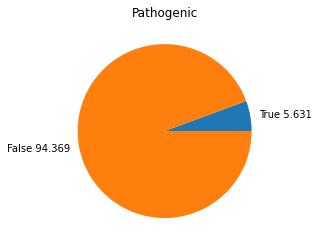

In [11]:
total = len(convertArray)
cttrue = 0
ctfalse = 0
for i in convertArray:
    cttrue += 1 if i[0][1] == 'True' else 0
    ctfalse += 1 if i[0][1] == 'False' else 0
print(round(cttrue/total * 100,2),round(ctfalse/total * 100,2))
plt.title("Pathogenic")
plt.pie([cttrue, ctfalse], labels = ["True " + str(round(cttrue/total * 100,3)), 
                                     "False " + str(round(ctfalse/total * 100,3))])
plt.show()

# Gene

In [12]:
possibleGene = ["NCCN", "HBOC", "MEN2", "PTEN", "MEN1", "ACMG", "FAMMM"]

In [13]:
ctGene = 0
for i in possibleGene: 
    if i != 'No Gene': ctGene+=1
lstOfGene = []
for i in convertArray:
    #if i[1][1] != "No Gene": print(i[1][1]) 
    lstOfGene.append(i[1][1])
#print("-"*20)
print("{} different Genes with total {} gene locations".format(len(set(lstOfGene)), ctGene))

26 different Genes with total 7 gene locations


# Delete bad data

### ```consent_approval```

There are only 2 possible options for this criteria, `yes` and `no` so adjusting all of them to that

In [14]:
for i in convertArray:
    for j in i:
        if j[0] == "consent_approval":
            j[1] = j[1].lower().strip()
            #Printing all possible wrong points
            if j[1] != "yes" and j[1] != "no":
                print(j[1])

### ```ethnicity```

In [15]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [16]:
def ethnicityChange(listofVals):
    listofVals = listofVals.lower().replace("/",",").replace("caucasion","caucasian").replace("american","america").replace("-",",").replace("and",",").replace("&",",").replace("english", "").replace("white", "caucasian").strip().split(",")
    #print(listofVals)
    updated = listofVals
    ct = 0
    for i in listofVals:
        if "not" in i or "non" in i:
            try:
                updated.remove(listofVals[ct+1])
            except:
                pass
        ct+=1

    lst = [value for value in updated if value != ""]
    #print(lst)
    ct = 0
    for j in lst:
        if j != spell.correction(j):
            lst[ct] = spell.correction(j)
            #print(j, spell.correction(j))
        ct+=1
    #print(lst)
    final = []
    for i in lst:
        if i in ethnicities:
            final.append(i)
        else:
            splitFinalVal = i.split(" ")
            for j in splitFinalVal:
                #print(j)
                if j in ethnicities:
                    final.append(j)
        #else:
            #print("Removed: ", i)
    return final

In [17]:
for i in convertArray:
    for j in i:
        if j[0] == "ethnicity":
            answers = ethnicityChange(j[1])
            j[1] = answers

### ```cancer_dx```

only yes or no answer

In [18]:
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx":
            j[1] = j[1].lower().strip()

### ```cancer_dx_type```


Going to drop look into later

In [19]:
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx_type":
            j[1] = j[1].lower().strip()
            if j[1] == "":
                j[1] = "-"
            print(j)

['cancer_dx_type', 'pre-cancer vulvar due to hpv']
['cancer_dx_type', 'pre-cancer vulvar due to hpv']
['cancer_dx_type', 'melanoma']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'prostate']
['cancer_dx_type', 'uterine']
['cancer_dx_type', 'triple negative breast cancer']
['cancer_dx_type', 'kidney']
['cancer_dx_type', 'uterine']
['cancer_dx_type', 'melanoma']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breat']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'colon']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'kidney']
['cancer_dx_type', 'breast']
['cancer_dx_type', 'dcis']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', 'skin']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_dx_type', '-']
['cancer_d

### ```relationships```

In [20]:
ctPointDelete = 0
for i in convertArray:
    for j in i:
        if j[0] == "relationships":
            #j[1] = j[1].lower().strip()
            pointsRemoved.append(["Relationships",ctPointDelete])
            #print(j[1])
    ctPointDelete+=1

In [21]:
for i in pointsRemoved:
    del convertArray[i[1]]
pointsRemoved = []

### ```cancer_dx_age```
average if multiple

In [22]:
ctRemovedAge = 0
for i in convertArray:
    for j in i:
        if j[0] == "cancer_dx_age":
            #j[1] = j[1].replace()
            if type(j[1]) != int and j[1] != '':
                r = j[1].strip().replace("and",",").split(",")
                r = [s.strip() for s in r]
                dele = False
                for vla in r:
                    try:
                        vla = int(vla)
                    except:
                        dele = True
                        convertArray.remove(i)
                        ctRemovedAge+=1
                if not dele: j[1] = int(statistics.mean(map(int, r)) )
print("Deleted {}".format(ctRemovedAge))

Deleted 7


### ```known_brca```

In [23]:
for i in convertArray:
    for j in i:
        if j[0] == "known_brca":
            j[1] = j[1].replace("U","unknown").lower().strip()
            #print(j)

### ```rel_relation```

In [24]:
import string

In [25]:
CounterList = []
exclude = set(string.punctuation)
for i in convertArray:
    for j in i:
        if j[0] == "rel_relation":
            #print(j)
            newList = []         
            for valr in j[1]:
                value = valr.lower().replace("paternal","").replace("mom","mother").replace("grandpa","grandfather")
                value = value.replace("grandma","grandmother").replace("first","").replace("dad","father").replace("1st","")
                value = value.replace("maternal","").replace("greatgrandmother", "great grandmother")
                value = ''.join(ch for ch in value if ch not in exclude)
                newList.append(value.strip())
            if len(newList) > 1 and "" in newList:
                newList.remove("")
            j[1] = list(set(newList))
            CounterList.extend(list(set(newList)))
            #print(j)

In [26]:
A = Counter(CounterList)
r=0
lol = 0
removeLst = []
for key, value in A.items():
    if value > 10:
        #print(key)#
        lol+=value
    else:
        r+=1

In [27]:
possibleRelationship = ["aunt", "brother", "cousin", "daughter", "father", "grandfather", "grandmother", "great aunt", 
                        "great grandfather", "great grandmother", "great uncle", "mother", "niece", "sister", "uncle"]

In [28]:
for i in convertArray:
    for j in i:
        if j[0] == "rel_relation":
            newList = []
            for valr in j[1]:
                if not valr in possibleRelationship:
                    newList.append("")
                else:
                    newList.append(valr)
            newList = list(set(newList))
            if ("" in newList) and (not "" in newList) and len(newList) != 1:
                newList.remove("")
            j[1] = newList
            print(j)
#possibleRelationship.append("")

['rel_relation', ['', 'mother']]
['rel_relation', ['', 'mother']]
['rel_relation', ['']]
['rel_relation', ['sister', 'father', 'aunt']]
['rel_relation', ['', 'father']]
['rel_relation', ['', 'brother', 'aunt']]
['rel_relation', ['sister', 'cousin', 'aunt', 'grandmother', 'uncle']]
['rel_relation', ['grandmother', 'aunt', 'cousin']]
['rel_relation', ['grandmother', 'aunt', 'grandfather']]
['rel_relation', ['grandmother', 'uncle', 'father']]
['rel_relation', ['', 'grandmother', 'mother', 'father']]
['rel_relation', ['father', 'brother', 'aunt']]
['rel_relation', ['', 'mother']]
['rel_relation', ['mother', 'father']]
['rel_relation', ['father', 'aunt']]
['rel_relation', ['']]
['rel_relation', ['', 'aunt']]
['rel_relation', ['']]
['rel_relation', ['mother', 'father']]
['rel_relation', ['grandmother', 'mother', 'aunt']]
['rel_relation', ['', 'aunt', 'grandfather', 'great uncle', 'mother', 'uncle', 'father']]
['rel_relation', ['', 'father', 'mother', 'daughter']]
['rel_relation', ['', 'uncle

['rel_relation', ['', 'mother']]
['rel_relation', ['', 'grandmother', 'mother', 'father']]
['rel_relation', ['mother', 'grandfather', 'father']]
['rel_relation', ['aunt', 'grandfather', 'grandmother', 'great grandmother', 'father']]
['rel_relation', ['grandmother', 'aunt', 'great grandmother', 'great aunt']]
['rel_relation', ['sister', 'grandfather', 'great grandmother']]
['rel_relation', ['grandmother', 'mother']]
['rel_relation', ['grandmother', 'mother']]
['rel_relation', ['mother', 'father']]
['rel_relation', ['grandmother', 'mother', 'brother']]
['rel_relation', ['grandmother', 'aunt']]
['rel_relation', ['grandmother', 'aunt']]
['rel_relation', ['grandmother', 'grandfather', 'cousin']]
['rel_relation', ['grandmother', 'father', 'grandfather', 'great grandmother']]
['rel_relation', ['sister', 'cousin', 'aunt']]
['rel_relation', ['', 'aunt']]
['rel_relation', ['', 'grandfather']]
['rel_relation', ['', 'aunt']]
['rel_relation', ['grandmother', 'aunt', 'grandfather']]
['rel_relation',

['rel_relation', ['']]
['rel_relation', ['', 'father']]
['rel_relation', ['']]
['rel_relation', ['']]
['rel_relation', ['', 'father']]
['rel_relation', ['grandmother', 'mother', 'cousin']]
['rel_relation', ['', 'cousin']]
['rel_relation', ['grandmother', 'great grandmother']]
['rel_relation', ['']]
['rel_relation', ['']]
['rel_relation', ['', 'grandmother', 'grandfather']]
['rel_relation', ['grandmother', 'grandfather']]
['rel_relation', ['grandmother', 'uncle', 'great aunt']]
['rel_relation', ['grandmother', 'mother', 'grandfather']]
['rel_relation', ['grandmother', 'grandfather']]
['rel_relation', ['', 'uncle']]
['rel_relation', ['', 'uncle']]
['rel_relation', ['grandmother', 'uncle', 'aunt', 'grandfather']]
['rel_relation', ['', 'grandfather']]
['rel_relation', ['mother', 'grandfather']]
['rel_relation', ['grandmother', 'mother', 'aunt']]
['rel_relation', ['', 'mother']]
['rel_relation', ['grandmother']]
['rel_relation', ['', 'grandmother']]
['rel_relation', ['']]
['rel_relation', [

### ```rel_cancer```

In [29]:
%%time
R = []
relCancerPoss = ["bile duct", "bladder", "bone", "brain", "breast", "cervical", "colon", "colorectal", "endometrial", 
                 "esophageal", "kidney", "leukemia", "liver", "lung", "lymphoma", "melanoma", "mesothelioma", "mouth", 
                 "myeloma", "non hodgkins lymphoma", "ovarian", "pancreas", "pancreatic", "prostate", "prostrate", "rectal",
                 "skin", "stomach", "testicular", "throat", "thyroid", "uterine"]
exclude = set(string.punctuation)
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            tst = []
            #print(j[1])
            for valr in j[1]:
                point = valr.lower().replace("cancer","").replace("prostrate","prostate").replace("unknown","").replace("multiple","").replace("leukemia cml", "leukemia").replace("tumor","").strip()
                point = ''.join(ch for ch in point if ch not in exclude)
                #print(point)
                for i in relCancerPoss:
                    if i in point:
                        point = i  
                if not point in relCancerPoss and point != "":
                    spellChange = spell.correction(point)
                    if point != spellChange:
                        point = spellChange
                tst.append(point)
            if len(tst) > 1 and "" in tst:
                tst.remove("")
            j[1] = list(set(tst))
            print(j)
            R.extend(j[1])
#relCancerPoss.append("")

['rel_cancer', ['squamous cell carcinoa', 'bladder', 'ovarian', 'liver', 'leukemia', 'breast']]
['rel_cancer', ['squamous cell carcinoa', 'bladder', 'ovarian', 'liver', 'leukemia', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['prostate', 'lymphoma']]
['rel_cancer', ['brain', 'colon', 'breast']]
['rel_cancer', ['lymphoma', 'bladder', 'pancreatic', 'lung', 'breast']]
['rel_cancer', ['skin', 'lung', 'breast']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['colon', 'leukemia', 'salivary gland']]
['rel_cancer', ['larynxtongue', 'skin', 'colon', 'tonsil', 'brain', 'breast']]
['rel_cancer', ['prostate', 'squamous cell carcinoma', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'bile duct']]
['rel_cancer', ['lung', 'adenocarcinoma']]
['rel_cancer', ['']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['prostate', 'breast']]
['rel_cancer', ['cervical', 'uterine', 'breast']]
['rel_cancer', ['', 'throat', 'stom

['rel_cancer', ['skin', 'adult age lukemia', 'breast']]
['rel_cancer', ['braca 1 positive', 'colon', 'pancreatic', 'breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['ovarian', 'breast']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['ovarian', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['kidney', 'lung', 'ovarian', 'breast']]
['rel_cancer', ['brain', 'breast']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['colon', 'pancreatic', 'breast']]
['rel_cancer', ['prostate', 'pancreatic', 'breast']]
['rel_cancer', ['skin', 'heart', 'breast']]
['rel_cancer', ['melanoma', 'merkel cell carcinoma', 'breast']]
['rel_cancer', ['bone', 'breast', 'ovarian', 'lung', 'unsure of type']]
['rel_cancer', ['colon']]
['rel_cancer', ['leukemia', 'lung', 'lymphoma', 'breast']]
['rel_cancer', ['lung', 'ovarian', 'breast', 'throat']]
['rel_cancer', ['lump on arm', 'throat', 'colon', 'ovarian', 'lung', 'breast']]
['rel_cancer', ['

['rel_cancer', ['ovarian', 'squamouse cell', 'pancreatic', 'breast']]
['rel_cancer', ['ovarian', 'thyroid', 'breast']]
['rel_cancer', ['', 'ovarian']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['leukemia', 'breast']]
['rel_cancer', ['prostate', 'pancreatic', 'breast']]
['rel_cancer', ['prostate', 'uterine', 'laryngeal']]
['rel_cancer', ['bone', 'uterine', 'colon', 'ovarian']]
['rel_cancer', ['breast']]
['rel_cancer', ['rectal', 'colon', 'melanoma', 'prostate', 'lung', 'leukemia', 'breast']]
['rel_cancer', ['laryngeal', 'brain', 'prostate', 'lung', 'uterine', 'breast']]
['rel_cancer', ['lung', 'ovarian', 'breast', 'colon']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['colon', 'ovarian']]
['rel_cancer', ['ovarian', 'breast', 'kidney']]
['rel_cancer', ['', 'rectal']]
['rel_cancer', ['bone', 'uterine', 'breast']]
['rel_cancer', ['bone', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['prostate', 'ovarian', 'breast', 'lymphoma']]
['rel_can

['rel_cancer', ['no  but brca2', 'stomach', 'skin', 'colon', 'no  but check2', 'ovarian', 'no paternal brca2', 'breast']]
['rel_cancer', ['ovarian', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['pancreatic']]
['rel_cancer', ['skin', 'colon', 'breast']]
['rel_cancer', ['breat', 'pancreatic', 'breast']]
['rel_cancer', ['bladder', 'skin', 'liver', 'lung', 'breast']]
['rel_cancer', ['lung', 'liver', 'breast', 'bladder']]
['rel_cancer', ['prostate', 'breast']]
['rel_cancer', ['prostate', 'had genetic testing  is positive for chek2 no', 'breast', 'chek2 and atm no  but had a double mastectomy']]
['rel_cancer', ['ovarian', 'breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['lung', 'leukemia', 'breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['melanoma', 'breast']]
['rel_cancer', ['cervical', 'bone', 'ovarian', 'melanoma']]
['rel_cancer', ['colon', 'lymphoma', 'breast']]
['rel_cancer', ['testicular', 'colon', 'breast']]
['rel_cancer', ['prosta

['rel_cancer', ['metatastic squamous cell', '']]
['rel_cancer', ['brain', 'mesothelioma', 'breast']]
['rel_cancer', ['stomach', 'lung']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['lung', 'breast', 'colon']]
['rel_cancer', ['cervical', 'breast']]
['rel_cancer', ['prostate', 'lung']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['skin', 'bone']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'intestinal']]
['rel_cancer', ['melanoma', 'colon', 'breast', 'bladder']]
['rel_cancer', ['melanoma', 'breast']]
['rel_cancer', ['', 'pancreatic']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['', 'glioblastoma']]
['rel_cancer', ['cervical', 'lung', 'skin', 'bladder']]
['rel_cancer', ['prostate', 'colon', 'liver', 'breast']]
['rel_cancer', ['cervical', 'colon', 'breast']]
['rel_cancer', ['stomach', 'prostate', 'breast']]
['rel_cancer', ['', 'uterine']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['prostate', 'breast

['rel_cancer', ['cholangiosarcoma', 'breast']]
['rel_cancer', ['stomach']]
['rel_cancer', ['breast']]
['rel_cancer', ['ibc', 'breast']]
['rel_cancer', ['tongue', 'leukemia', 'breast']]
['rel_cancer', ['cervical', 'prostate', 'breast', 'mole had  cells but removed']]
['rel_cancer', ['skin', 'bone', 'colon']]
['rel_cancer', ['lung', 'breast']]
['rel_cancer', ['uterine', 'breast']]
['rel_cancer', ['thyroid', 'breast']]
['rel_cancer', ['lung', 'breast']]
['rel_cancer', ['cervical', 'breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['lung', 'breast']]
['rel_cancer', ['lung', 'breast', 'throat']]
['rel_cancer', ['prostate', 'colon']]
['rel_cancer', ['that', 'lung', 'breast']]
['rel_cancer', ['myeloma', 'breast']]
['rel_cancer', ['lung', 'colon']]
['rel_cancer', ['skin', 'colon']]
['rel_cancer', ['prostate', 'colon']]
['rel_cancer', ['prostate', 'breast']]
['rel_cancer', ['breast', 'esophageal']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['melanoma', 'colon', 'cervical']]
['rel_ca

['rel_cancer', ['lung', 'colon', 'leukemia', 'medullary thryoid']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['lung', 'breast', 'colon']]
['rel_cancer', ['thyroid', 'breast']]
['rel_cancer', ['breast']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['stomach', 'breast', 'adenocarcinoma of ampulla of vate']]
['rel_cancer', ['cervical', 'prostate', 'breast']]
['rel_cancer', ['myeloma', 'lung', 'pancreatic', 'breast']]
['rel_cancer', ['', 'bile duct']]
['rel_cancer', ['uterine', 'ovarian']]
['rel_cancer', ['squamous cell', 'myeloma', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['lung', 'breast']]
['rel_cancer', ['colon', 'mesothelioma', 'not sure what kind', 'breast']]
['rel_cancer', ['lung', 'leukemia', 'colon']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['', 'bone']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['lymphoma', 'melanoma', 'lung', 'leukemia', 'breast']]
['rel_cancer', ['leukemia', 'squamous carcinoma']]
['rel_canc

['rel_cancer', ['', 'renal cell carcinoma']]
['rel_cancer', ['prostate', 'colon', 'myeloma', 'breast']]
['rel_cancer', ['prostate', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['melanoma', '']]
['rel_cancer', ['uterine', 'breast']]
['rel_cancer', ['', 'colon']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['prostate', 'mouth']]
['rel_cancer', ['prostate', 'thyroid']]
['rel_cancer', ['skin', 'brain']]
['rel_cancer', ['myeloma', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['melanoma', 'breast']]
['rel_cancer', ['skin', 'prostate', 'leukemia', 'breast']]
['rel_cancer', ['melanoma', 'breast']]
['rel_cancer', ['lymphoma', 'breast']]
['rel_cancer', ['', 'liver']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['skin', 'breast', 'all organs terminal when found']]
['rel_cancer', ['melanoma', 'thyroid', 'breast']]
['rel_cancer', ['colon', 'basal cell']]
['rel_cancer', ['prostate', 'breast']]
['rel_cancer', ['skin', 'stomach', 'brain', 'leukemia', 'breast']]
['rel_cancer

['rel_cancer', ['giant cell', 'prostate']]
['rel_cancer', ['melanoma', '']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['colon', 'breast']]
['rel_cancer', ['skin', '']]
['rel_cancer', ['', 'prostate']]
['rel_cancer', ['', 'thyroid']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['', 'thyroid']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['cervical', 'lung']]
['rel_cancer', ['']]
['rel_cancer', ['', 'lung']]
['rel_cancer', ['bone', 'squamous cell carcinoma nasal septum']]
['rel_cancer', ['prostate', 'lymphoma', 'throat']]
['rel_cancer', ['skin', 'thyroid']]
['rel_cancer', ['']]
['rel_cancer', ['']]
['rel_cancer', ['skin', 'lung']]

In [30]:
for i in convertArray:
    for j in i:
        if j[0] == "rel_cancer":
            print(j)

['rel_cancer', ['squamous cell carcinoa', 'bladder', 'ovarian', 'liver', 'leukemia', 'breast']]
['rel_cancer', ['squamous cell carcinoa', 'bladder', 'ovarian', 'liver', 'leukemia', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['prostate', 'lymphoma']]
['rel_cancer', ['brain', 'colon', 'breast']]
['rel_cancer', ['lymphoma', 'bladder', 'pancreatic', 'lung', 'breast']]
['rel_cancer', ['skin', 'lung', 'breast']]
['rel_cancer', ['colon', 'uterine']]
['rel_cancer', ['colon', 'leukemia', 'salivary gland']]
['rel_cancer', ['larynxtongue', 'skin', 'colon', 'tonsil', 'brain', 'breast']]
['rel_cancer', ['prostate', 'squamous cell carcinoma', 'breast']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['breast', 'bile duct']]
['rel_cancer', ['lung', 'adenocarcinoma']]
['rel_cancer', ['']]
['rel_cancer', ['', 'breast']]
['rel_cancer', ['']]
['rel_cancer', ['prostate', 'breast']]
['rel_cancer', ['cervical', 'uterine', 'breast']]
['rel_cancer', ['', 'throat', 'stom

### ```rel_age```

In [31]:
exclude = set(string.punctuation)
ctdelRel_AGE = 0
pointersToRemove = 0
for i in convertArray:
    for j in i:
        if j[0] == "rel_age":
            newListAge = []
            for val in j[1]:
                valr = val.replace("unknown", "").replace("?", "").replace("late", "").replace("ish", "").replace("s", "").replace("'", "").replace("appx", "").replace("approx.", "").replace("~", "").replace("Over", "").strip()
                valr = ''.join(ch for ch in valr if ch not in exclude)
                try:
                    valr = valr.lower().strip().replace("n/a","").replace("not sure","").replace("not ure","").replace("non","").replace("unure","").replace("Ukwn","").replace("unk","").replace("unknown","").replace("Unkown","").replace("UK","")
                except:
                    print("Error Check - ", valr)
                    raise Exception("Changing Text")
                if valr != "":
                    try:
                        newListAge.append(int(valr))            
                    except:
                        print("Deleting:", valr)
            if len(newListAge) > 3:
                a,b,c = np.percentile(newListAge, [25, 50, 75])
                j[1] = [int(a),int(b),int(c)]
            elif len(newListAge) == 3:
                j[1] = newListAge
            elif len(newListAge) == 2:
                j[1] = [newListAge[0], newListAge[1], 0] 
            elif len(newListAge) == 1:
                j[1] = [newListAge[0], 0, 0] 
            else:
                print(j)
                j[1] = [0,0,0]
    pointersToRemove+=1
print(ctdelRel_AGE)

['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
Deleting: 55 75
Deleting: 10 month
['rel_age', ['', '', '']]
Deleting: 60õ
['rel_age', ['', '', '']]
['rel_age', ['', '', '']]
Deleting: 52 82
Deleting: 41 85
['rel_age', ['', '', '']]
Deleting: 75  82
['rel_age', ['', '', '', '', '', '']]
Deleting: 56 40
['rel_age', ['', '', '']]
Deleting: a little either  30 or in her 50
Deleting: 50 or 60
Deleting: 60 or older
Deleting: 40 50
Deleting: 60   70
['rel_age', ['?', '?', '']]
['rel_age', ['', '', '']]
Deleting: nown
Deleting: nown
Deleting: na
['rel_age', ['n/a', '', '']]
Deleting: 59 44
['rel_age', ['59, 44', '', '']]
['rel_age', ['', '', '', '', '', '', '']]
Deleting: 60õ
['rel_age', ['?', '?', '?']]
Deleting: na
Deleting: nown
Deleting: na
Deleting: na
Deleting: 28 59
Deleting: 50 60
Deleting: 40 50
['rel_age', ['', '', '']]
Deleting: na
['rel_age', ['unknown', 'unknown', '']]
['rel_age', ['?', '', '']]
['rel_age', ['', '', '']]
Deleting: 60õ
Deleting: 80õ
[

### ```_method```

Since this column is esentially useless, I will drop it

In [32]:
#for i in convertArray:
    #for j in i:
        #if j[0] == "_method":
            #print(j)

### ```other_cancer```

Too few data points

In [33]:
for i in convertArray:
    for j in i:
        if j[0] == "other_cancer":
            print(j)

['other_cancer', 'No']
['other_cancer', 'Yes']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'Yes']
['other_cancer', 'Yes']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'No']
['other_cancer', 'Yes']


# Show Data

In [34]:
def conv2dLstTo1d(array):
    r = []
    for i in array:
        if type(i) == list:
            for j in i:
                r.append(j)
        else:
            r.append(i)
    return r

In [35]:
display = []
titles = ["Name","Percentage", "Count", "Types", "Example 5 data"]
lstOfAllData = []
total = 0
for txt in possible:
    tempArrayTypes=[]
    ctVal = 0
    ctR = 0
    for i in convertArray:
        hasValue = False
        for j in i:
            if j[0] == txt:
                hasValue = True
                tempArrayTypes.append(j[1])
                ctR+=1
        if not hasValue: ctVal += 1
    total+=1
    display.append([txt, (ctVal/total)*100, ctR,len(set(conv2dLstTo1d(tempArrayTypes))), 
                    list(Counter(conv2dLstTo1d(tempArrayTypes)).keys())[0:5]])
    lstOfAllData.append([txt, list(Counter(conv2dLstTo1d(tempArrayTypes)).keys())])
    

In [36]:
df = pd.DataFrame(display, columns = titles)

In [37]:
df

,Name,Percentage,Count,Types,Example 5 data
0,Pathogenic,0.000000,2181,2,"[False, True]"
1,Gene,0.000000,2181,26,"[No Gene, CDH1, BRCA2, CHEK2, RAD50]"
2,History_class,0.000000,2181,4,"[strong_personal, strong_family, not_strong, n..."
3,consent_approval,9825.000000,1788,2,"[yes, no]"
4,ethnicity,0.000000,2181,28,"[caucasian, hispanic, irish, european, america]"
5,cancer_dx,66.666667,2177,2,"[yes, no]"
6,cancer_dx_type,0.000000,2181,52,"[pre-cancer vulvar due to hpv, melanoma, breas..."
7,relationships,27112.500000,12,11,"[[{""""relationship_type""""=>""""Sister"""", """"cancer..."
8,cancer_dx_age,0.000000,2181,56,"[57, 32, 37, 55, 58]"
9,known_brca,130.000000,2168,3,"[unknown, yes, no]"


In [38]:
for i in pointsRemoved:
    del convertArray[i[1]]

# Encoding

In [93]:
requiredTitles = ['Pathogenic','Gene','History_class','consent_approval','ethnicity','cancer_dx','cancer_dx_type',
                  'relationships','cancer_dx_age','known_brca','known_cancer','rel_relation','rel_cancer','rel_age',
                  '_method','other_cancer']
finalData = []
for i in convertArray:
    tempArray = i
    titlesArrayTemp = []
    for j in tempArray:
        titlesArrayTemp.append(j[0])
    for k in requiredTitles:
        if not k in titlesArrayTemp:
            if k == "rel_age":
                tempArray.append([k,[0,0,0]])
            #else:
                #tempArray.append([k,"-"])
    tempArray.sort()
    finalData.append(tempArray)

In [95]:
dfx = pd.DataFrame(convertArray)

In [97]:
len(finalData)

2181

In [102]:
A = ['Gene','_method', 'relationships', 'cancer_dx_type']
finalDataRemoved = []
for i in finalData:
    t = []
    for j in i:
        if not (j[0] in A):
            t.append(j)
    finalDataRemoved.append(t)

In [103]:
dfxx = pd.DataFrame(finalDataRemoved)

In [106]:
finalDataRemoved[0]

[['History_class', 'strong_personal'],
 ['Pathogenic', 'False'],
 ['cancer_dx', 'yes'],
 ['cancer_dx_age', 57],
 ['consent_approval', 'yes'],
 ['ethnicity', ['caucasian']],
 ['known_brca', 'unknown'],
 ['known_cancer', 'yes'],
 ['rel_age', [55, 64, 70]],
 ['rel_cancer',
  ['squamous cell carcinoa',
   'bladder',
   'ovarian',
   'liver',
   'leukemia',
   'breast']],
 ['rel_relation', ['', 'mother']]]

In [130]:
ct = 0
finalDataCleanLength = [] 
for i in finalDataRemoved:
    i = sorted(i)
    #print(i)
    temp = i
    skip = False
    if i[0][0] != "History_class":
        print("Missing History_class:\t",i)
        skip = True
    if i[1][0] != "Pathogenic":
        print("Missing Pathogenic:\t")
        temp.append(['Pathogenic', 'False'])
        print("")
    if i[2][0] != "cancer_dx":
        print("Missing cancer_dx:\t")
        temp.append(['cancer_dx', '-'])
        print("")
    if i[3][0] != "cancer_dx_age":
        print("Missing cancer_dx_age:\t")
        temp.append(['cancer_dx_age', ''])
        print("")
    if i[4][0] != "consent_approval":
        print("Missing consent_approval:\t")
        temp.append(['consent_approval', '-'])
        print("")
    if i[5][0] != "ethnicity":
        print("Missing ethnicity:\t")
        temp.append(['ethnicity', '-'])
        print("")
    if i[6][0] != "known_brca":
        print("Missing known_brca:\t")
        temp.append(['known_brca', '-'])
        print("")
    try:
        if i[7][0] != "known_cancer":
            print("Missing known_cancer:\t")
            temp.append(['known_cancer', '-'])
            print("")
    except:
        print(len(i))
        temp.append(['known_cancer', '-'])
    try:
        if i[8][0] != "rel_age":
            print("Missing rel_age:\t")
            temp.append(['known_cancer', ["0","0","0"]])
            print("")
    except:
        print(len(i))
        temp.append(['known_cancer', ["0","0","0"]])
    try:
        if i[9][0] != "rel_cancer":
            print("Missing rel_cancer:\t")
            temp.append(['rel_cancer', '-'])
            print("")
    except:
        print(len(i))
        temp.append(['rel_cancer', '-'])
    try:
        if i[10][0] != "rel_relation":
            print("Missing rel_relation:\t")
            temp.append(['rel_relation', '-'])
            print("")
    except:
        print(len(i))
        temp.append(['rel_relation', '-'])
    if not skip:
        finalDataCleanLength.append(temp)

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:


Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent_approval:	

Missing ethnicity:	

Missing known_brca:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing consent


Missing rel_relation:	

Missing known_cancer:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing rel_relation:	

Missing known_cancer:	

Missing rel_age:	

Missing rel_cancer:	

Missing

In [134]:
for i in finalDataCleanLength:
    if len(i) != 11: print(i)

[['History_class', 'strong_personal'], ['Pathogenic', 'False'], ['cancer_dx', 'no'], ['cancer_dx_age', 32], ['ethnicity', ['caucasian']], ['known_brca', 'unknown'], ['known_cancer', 'no'], ['rel_age', [0, 0, 0]], ['rel_cancer', ['']], ['rel_relation', ['']], ['consent_approval', '-'], ['ethnicity', '-'], ['known_brca', '-'], ['known_cancer', '-'], ['known_cancer', ['0', '0', '0']], ['rel_cancer', '-'], ['rel_relation', '-']]
[['History_class', 'strong_personal'], ['Pathogenic', 'False'], ['cancer_dx', 'yes'], ['cancer_dx_age', 37], ['ethnicity', ['hispanic']], ['known_brca', 'unknown'], ['known_cancer', 'yes'], ['rel_age', [74, 60, 70]], ['rel_cancer', ['colon', 'uterine']], ['rel_relation', ['sister', 'father', 'aunt']], ['consent_approval', '-'], ['ethnicity', '-'], ['known_brca', '-'], ['known_cancer', '-'], ['known_cancer', ['0', '0', '0']], ['rel_cancer', '-'], ['rel_relation', '-']]
[['History_class', 'strong_personal'], ['Pathogenic', 'False'], ['cancer_dx', 'yes'], ['cancer_dx_

In [126]:
sorted([['History_class', 'strong_personal'], ['Pathogenic', 'False'], ['cancer_dx', 'yes'], ['cancer_dx_age', 57], ['consent_approval', 'yes'], ['ethnicity', ['caucasian']], ['known_brca', 'unknown'], ['known_cancer', 'yes'], ['rel_age', [55, 64, 70]], ['rel_cancer', ['squamous cell carcinoa', 'bladder', 'ovarian', 'liver', 'leukemia', 'breast']], ['rel_relation', ['', 'mother']]])

[['History_class', 'strong_personal'],
 ['Pathogenic', 'False'],
 ['cancer_dx', 'yes'],
 ['cancer_dx_age', 57],
 ['consent_approval', 'yes'],
 ['ethnicity', ['caucasian']],
 ['known_brca', 'unknown'],
 ['known_cancer', 'yes'],
 ['rel_age', [55, 64, 70]],
 ['rel_cancer',
  ['squamous cell carcinoa',
   'bladder',
   'ovarian',
   'liver',
   'leukemia',
   'breast']],
 ['rel_relation', ['', 'mother']]]

In [43]:
for i in finalDataRemoved:
    if i[1][0] == "cancer_dx_age":
        i.insert(1, ['cancer_dx', 'no'])
    if i[2][0] == "consent_approval":
        i.insert(2, ['cancer_dx_age', "0"])
    if i[3][0] == "ethnicity":
        i.insert(3, ['consent_approval', 'no'])
    if i[4][0] == "known_brca":
        i.insert(4, ['ethnicity', ['']])
    if i[5][0] == "known_cancer":
        i.insert(5, ['known_brca', ''])
    if i[6][0] == "rel_age":
        i.insert(6,['known_cancer', 'no'])
    if i[7][0] == "rel_cancer":
        i.insert(7, ['rel_age', [0, 0, 0]])
    try:
        if i[8][0] == "rel_relation":
            i.insert(8, ['rel_cancer', ['']])
    except:
        pass

In [44]:
ct = 0
ctDeleted = 0
for i in finalDataRemoved:
    if len(i) != 10:
        del finalDataRemoved[ct]
        ctDeleted+=1
    ct+=1
print(ct)
print(ctDeleted)

1329
853


In [45]:
def encodeRelationship(lst):
    string = ""
    for rel in possibleRelationship:
        if rel in lst:
            string+="1"
        else:
            string+="0"
    return string
def encodeRelCancer(lst):
    string = ""
    for rel in relCancerPoss:
        if rel in lst:
            string+="1"
        else:
            string+="0"
    return string
ethnicity = ['caucasian', 'hispanic', 'american', 'american indian', 'america', 'german', 'black', 'african american', 'indian', 
 'italian', 'polish', 'middle eastern', 'jewish', 'japanese', 'irish', 'european', 'asian', 'asian american', 'swedish', 
 'latino', 'scottish', 'greek', 'korean', '-']
def encodeEthnicity(lst):
    string = ""
    for rel in ethnicity:
        if rel in lst:
            string+="1"
        else:
            string+="0"
    return string

In [46]:
"""count=0
for j in finalDataRemoved:
    j = j.sort()
    if not j[0][0] == "Pathogenic":
        print("Pathogenic", j[0])
        j[0] = ["Pathogenic", "0"]
    if not j[1][0] == "cancer_dx":
        print("cancer_dx", j[1])
    if not j[2][0] == "cancer_dx_age":
        print("cancer_dx_age", j[2])
    if not j[3][0] == "consent_approval":
        print("consent_approval", j[3])
    if not j[4][0] == "ethnicity":
        print("ethnicity", j[4])
    if not j[5][0] == "known_brca":
        print("known_brca", j[5])
    if not j[6][0] == "rel_age":
        print("rel_age", j[6])
    if not j[7][0] == "rel_cancer":
        print("rel_cancer", j[7])
    if not j[8][0] == "rel_relation":
        print("rel_relation", j[8])
    count+=1"""

'count=0\nfor j in finalDataRemoved:\n    j = j.sort()\n    if not j[0][0] == "Pathogenic":\n        print("Pathogenic", j[0])\n        j[0] = ["Pathogenic", "0"]\n    if not j[1][0] == "cancer_dx":\n        print("cancer_dx", j[1])\n    if not j[2][0] == "cancer_dx_age":\n        print("cancer_dx_age", j[2])\n    if not j[3][0] == "consent_approval":\n        print("consent_approval", j[3])\n    if not j[4][0] == "ethnicity":\n        print("ethnicity", j[4])\n    if not j[5][0] == "known_brca":\n        print("known_brca", j[5])\n    if not j[6][0] == "rel_age":\n        print("rel_age", j[6])\n    if not j[7][0] == "rel_cancer":\n        print("rel_cancer", j[7])\n    if not j[8][0] == "rel_relation":\n        print("rel_relation", j[8])\n    count+=1'

In [50]:
finalDataDF = []
for i in finalDataRemoved:
    tempArray = []
    for j in i:
        if j[0] == "History_class": 
            if j[1] == "strong_personal":
                tempArray.append("11")
            elif j[1] == "strong_family":
                tempArray.append("10")
            elif j[1] == "not_strong":
                tempArray.append("01")
            elif j[1] == "none":
                tempArray.append("00")
        elif j[0] == "ethnicity": 
            tempArray.append(encodeEthnicity(j[1]))
        elif j[0] == "rel_relation":
            tempArray.append(encodeRelationship(j[1]))
        elif j[0] == "rel_cancer":
            tempArray.append(encodeRelCancer(j[1]))
        elif j[0] == "rel_age":
            try:
                tempArray.append(str(j[1][0]))
                tempArray.append(str(j[1][1]))
                tempArray.append(str(j[1][2]))
            except IndexError:
                print("Error with data defaulting to 0")
                print(j)
                tempArray.append("0")
                tempArray.append("0")
                tempArray.append("0")
        
        elif j[0] == "cancer_dx_age":
            if j[1] == "":
                tempArray.append("0")
            else:
                tempArray.append(str(j[1]))
        
        elif j[0] == "Pathogenic":
            if j[1] == "False":
                tempArray.append("0")
            elif j[1] == "True":
                tempArray.append("1")
            else:
                print(j[0], "ERROR")
        
        elif j[0] == "consent_approval":             
            if j[1] == "-":
                tempArray.append(str("00"))
            elif j[1] == "no":
                tempArray.append(str("01"))
            elif j[1] == "yes":
                tempArray.append(str("10"))
            else:
                print(j[0], "ERROR")
        elif j[0] == "known_cancer":             
            if j[1] == "-":
                tempArray.append(str("00"))
            elif j[1] == "no":
                tempArray.append(str("01"))
            elif j[1] == "yes":
                tempArray.append(str("10"))
            else:
                print(j[0], "ERROR", j[1])
        
        elif j[0] == "cancer_dx":             
            if j[1] == "-":
                tempArray.append(str("00"))
            elif j[1] == "no":
                tempArray.append(str("01"))
            elif j[1] == "yes":
                tempArray.append(str("10"))
            else:
                print(j[0], "ERROR", j[1])
            
        elif j[0] == "other_cancer":             
            if j[1] == "-":
                tempArray.append(str("00"))
            elif j[1].lower() == "no":
                tempArray.append(str("01"))
            elif j[1].lower() == "yes":
                tempArray.append(str("10"))
            else:
                print(j[0], "ERROR", j[1])   
            
        elif j[0] == "known_brca":
            if j[1] == "unknown":
                tempArray.append(str("00"))
            elif j[1] == "no":
                tempArray.append(str("01"))
            elif j[1] == "yes":
                tempArray.append(str("10"))
            elif j[1] == "-":
                tempArray.append(str("11"))
            else:
                print(j[0], "ERROR", j[1])
        else:
            try:
                tempArray.append(str(j[1]))
            except:
                print(j)
    #print(tempArray)
    #print("")
    finalDataDF.append(tempArray)

known_brca ERROR 
['basal cell skin"", ""prostate, basal cell skin cancer"", ""melanoma of vagina (rare)"", ""ovarian"", ""ovarian"", ""breast"", ""basal cell skin cancer"", ""stomach cancer"", ""breast cancer"", ""prostate""]']
['breast x  2 types']
['European']
known_brca ERROR 
['Caucasian']


In [51]:
dfData = finalDataDF
for i in finalDataDF:
    for j in i:
        try:
            int(j)
        except:
            print(i)
            dfData.remove(i)

['yes', '00', '1', '01', '0', '100000000000000000000000', '00', '01', '0', '0', '0', '00000000000000000000000000000000', '000000000000000']


In [57]:
for i in range(10):
    print(dfData[random.randint(0,len(dfData))])

['00', '0', '01', '0', '10', '000000000000000010000000', '00', '01', '0', '0', '0', '00000000000000000000000000000000', '000000000000000']
['11', '0', '10', '55', '100000000000000000000000', '00', '10', '72', '0', '0', '00000000000000100000000100000000', '000010000000000']
['01', '0', '01', '0', '10', '100000000000000000000000', '00', '01', '0', '0', '0', '01000000000000010000000000000000', '000001100000000']
['01', '0', '01', '0', '10', '100000000000000000000000', '00', '01', '63', '68', '70', '01001010011001000000000100000000', '001001110001001']
['10', '0', '01', '50', '10', '100000000000000000000000', '00', '01', '70', '67', '0', '00001000000001000000000000000000', '000010000001000']
['10', '0', '01', '0', '10', '100000000000000000000000', '00', '01', '50', '57', '66', '00001000000010000000010000000000', '100001000000001']
['10', '0', '01', '0', '10', '000000001000000010000000', '00', '01', '47', '53', '62', '00000000100001000000100100000000', '100001100001001']
['10', '0', '01', '

In [76]:
df = pd.DataFrame(dfData, columns = ['History_class','Pathogenic','cancer_dx','cancer_dx_age','consent_approval','ethnicity',
                                      'known_brca','known_cancer','rel_age_1','rel_age_2','rel_age_3','rel_cancer',
                                      'rel_relation'])

In [77]:
df

,History_class,Pathogenic,cancer_dx,cancer_dx_age,consent_approval,ethnicity,known_brca,known_cancer,rel_age_1,rel_age_2,rel_age_3,rel_cancer,rel_relation
0,11,0,10,57,10,100000000000000000000000,00,10,55,64,70,01001000000110000000100000000000,000000000001000
1,11,0,01,32,100000000000000000000000,00,01,0,0,0,00000000000000000000000000000000,000000000000000,None
2,11,0,10,37,010000000000000000000000,00,10,74,60,70,00000010000000000000000000000001,100010000000010,None
3,11,0,10,55,100000000000000000000000,00,10,72,0,0,00000000000000100000000100000000,000010000000000,None
4,11,0,10,47,10,100000000000000100000000,00,01,58,68,71,01001000000001100000001000000000,101000100000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,00,0,01,0,10,100000000000000000000000,00,01,50,0,0,00000100000000000000000000000000,000000000001000
1323,00,0,01,0,10,100000000000000000000000,00,01,0,0,0,00000000000001000000000000000000,000000100000000
1324,00,0,01,0,10,100000000000000000000000,00,01,0,0,0,00000000000000000000000000000000,000000000000000
1325,00,0,01,0,10,100000000000000000000000,00,01,81,0,0,00000000000000000000000000000000,000001000000000


In [79]:
df['History_class'] = df['History_class'].astype('string')
df['Pathogenic'] = df['Pathogenic'].astype('string')
df['cancer_dx'] = df['cancer_dx'].astype('string')
df['cancer_dx_age'] = df['cancer_dx_age'].astype('string')
df['consent_approval'] = df['consent_approval'].astype('string')
df['ethnicity'] = df['ethnicity'].astype('string')
df['known_brca'] = df['known_brca'].astype('string')
df['known_cancer'] = df['known_cancer'].astype('string')
df['rel_age_1'] = df['rel_age_1'].astype('string')
df['rel_age_2'] = df['rel_age_2'].astype('string')
df['rel_age_3'] = df['rel_age_3'].astype('string')
df['rel_cancer'] = df['rel_cancer'].astype('string')
df['rel_relation'] = df['rel_relation'].astype('string')

In [80]:
df.dtypes

History_class       string
Pathogenic          string
cancer_dx           string
cancer_dx_age       string
consent_approval    string
ethnicity           string
known_brca          string
known_cancer        string
rel_age_1           string
rel_age_2           string
rel_age_3           string
rel_cancer          string
rel_relation        string
dtype: object

In [140]:
ctChange=0
r = []
for i in dfData:
    temp = []
    for j in i:
        intChange = True
        try:
            int(j)
        except:
            intChange = False
            ctChange+=1
        if intChange:
            temp.append(j)
        else:
            temp.append(0)
    if len(temp) == 13:
        r.append(temp)       

In [186]:
dfR = pd.DataFrame(r, columns= ['History_class','Pathogenic','cancer_dx','cancer_dx_age','consent_approval','ethnicity',
                              'known_brca','known_cancer','rel_age_1','rel_age_2','rel_age_3','rel_cancer',
                              'rel_relation'])

In [187]:
dfR = dfR.drop(['ethnicity', 'rel_cancer', 'rel_relation'], axis=1)

In [188]:
dfR['History_class'] = dfR['History_class'].astype('int64')
dfR['Pathogenic'] = dfR['Pathogenic'].astype('int64')
dfR['cancer_dx'] = dfR['cancer_dx'].astype('int64')
dfR['cancer_dx_age'] = dfR['cancer_dx_age'].astype('int64')
dfR['consent_approval'] = dfR['consent_approval'].astype('int64')
#dfR['ethnicity'] = dfR['ethnicity'].astype('int64')
dfR['known_brca'] = dfR['known_brca'].astype('int64')
dfR['known_cancer'] = dfR['known_cancer'].astype('int64')
dfR['rel_age_1'] = dfR['rel_age_1'].astype('int64')
dfR['rel_age_2'] = dfR['rel_age_2'].astype('int64')
dfR['rel_age_3'] = dfR['rel_age_3'].astype('int64')
#dfR['rel_cancer'] = dfR['rel_cancer'].astype('int64')
#dfR['rel_relation'] = dfR['rel_relation'].astype('int64')

In [224]:
dfR

,History_class,Pathogenic,cancer_dx,cancer_dx_age,consent_approval,known_brca,known_cancer,rel_age_1,rel_age_2,rel_age_3
0,11,0,10,57,10,0,10,55,64,70
1,11,0,10,47,10,0,1,58,68,71
2,11,0,10,20,10,10,10,70,50,70
3,11,0,10,41,10,0,10,89,60,80
4,11,0,10,51,10,10,1,68,64,0
...,...,...,...,...,...,...,...,...,...,...
808,0,0,1,0,10,0,1,50,0,0
809,0,0,1,0,10,0,1,0,0,0
810,0,0,1,0,10,0,1,0,0,0
811,0,0,1,0,10,0,1,81,0,0


In [293]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pyimagesearch import datasets
from pyimagesearch import models
import numpy as np
import argparse
import locale
import os

In [333]:
#(trainX, testX) = train_test_split(dfR, test_size=0.25, random_state=42)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
trainX.astype('float')
testX.astype('float')
trainY.astype('float')
testY.astype('float')

247    10.0
589     0.0
227    10.0
291     1.0
539     1.0
       ... 
676     0.0
440     1.0
757     0.0
518     1.0
664     0.0
Name: History_class, Length: 163, dtype: float64

In [335]:
"""maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice"""

'maxPrice = train["price"].max()\ntrainY = train["price"] / maxPrice\ntestY = test["price"] / maxPrice'

In [336]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = tf.keras.Sequential()
	model.add(layers.Dense(8, input_dim=dim, activation="relu"))
	model.add(layers.Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(layers.Dense(1, activation="linear"))
	# return our model
	return model

In [337]:
model = create_mlp(trainX.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(x=trainX, y=trainY, 
    validation_data=(testX, testY),
    epochs=200, batch_size=8)

[INFO] training model...
Epoch 1/200
82/82 [==============================] - 0s 3ms/step - loss: 692732672.0000 - val_loss: 464217568.0000
Epoch 2/200
82/82 [==============================] - 0s 1ms/step - loss: 466735648.0000 - val_loss: 275810976.0000
Epoch 3/200
82/82 [==============================] - 0s 1ms/step - loss: 268257328.0000 - val_loss: 107015768.0000
Epoch 4/200
82/82 [==============================] - 0s 1ms/step - loss: 82203680.0000 - val_loss: 24548974.0000
Epoch 5/200
82/82 [==============================] - 0s 1ms/step - loss: 16134068.0000 - val_loss: 36074540.0000
Epoch 6/200
82/82 [==============================] - 0s 1ms/step - loss: 18969612.0000 - val_loss: 54281644.0000
Epoch 7/200
82/82 [==============================] - 0s 1ms/step - loss: 49210708.0000 - val_loss: 6722572.5000
Epoch 8/200
82/82 [==============================] - 0s 1ms/step - loss: 7651224.0000 - val_loss: 43583028.0000
Epoch 9/200
82/82 [==============================] - 0s 1ms/step - 

Epoch 73/200
82/82 [==============================] - 0s 1ms/step - loss: 20214242.0000 - val_loss: 6048789.0000
Epoch 74/200
82/82 [==============================] - 0s 1ms/step - loss: 8049525.5000 - val_loss: 18606354.0000
Epoch 75/200
82/82 [==============================] - 0s 1ms/step - loss: 21361216.0000 - val_loss: 15472894.0000
Epoch 76/200
82/82 [==============================] - 0s 1ms/step - loss: 18547564.0000 - val_loss: 2243396.5000
Epoch 77/200
82/82 [==============================] - 0s 1ms/step - loss: 10223916.0000 - val_loss: 10598846.0000
Epoch 78/200
82/82 [==============================] - 0s 1ms/step - loss: 9029205.0000 - val_loss: 23293514.0000
Epoch 79/200
82/82 [==============================] - 0s 1ms/step - loss: 22816960.0000 - val_loss: 3029035.5000
Epoch 80/200
82/82 [==============================] - 0s 1ms/step - loss: 11317585.0000 - val_loss: 13594921.0000
Epoch 81/200
82/82 [==============================] - 0s 1ms/step - loss: 6572984.5000 - val_

82/82 [==============================] - 0s 1ms/step - loss: 12860351.0000 - val_loss: 628993.1250
Epoch 146/200
82/82 [==============================] - 0s 2ms/step - loss: 754330.6875 - val_loss: 1049692.8750
Epoch 147/200
82/82 [==============================] - 0s 2ms/step - loss: 10307674.0000 - val_loss: 224322.7188
Epoch 148/200
82/82 [==============================] - 0s 1ms/step - loss: 1260765.3750 - val_loss: 895075.0625
Epoch 149/200
82/82 [==============================] - 0s 1ms/step - loss: 9195741.0000 - val_loss: 70556.4766
Epoch 150/200
82/82 [==============================] - 0s 997us/step - loss: 2098403.2500 - val_loss: 7015.3384
Epoch 151/200
82/82 [==============================] - 0s 1ms/step - loss: 7965381.5000 - val_loss: 24761.1973
Epoch 152/200
82/82 [==============================] - 0s 1ms/step - loss: 2511019.5000 - val_loss: 21945.6465
Epoch 153/200
82/82 [==============================] - 0s 1ms/step - loss: 7698982.5000 - val_loss: 193610.7031
Epoch 1

In [338]:
print("[INFO] predicting house prices...")
preds = model.predict(testX)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
# finally, show some statistics on our model
print("[INFO] avg. house price: {}, std house price: {}".format(
    df["History_class"].astype('int64').mean(),
    df["History_class"].astype('int64').std()))
print("[INFO] mean: {}%, std: {}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: 3.6639035418236623, std house price: 4.457618504286079
[INFO] mean: inf%, std: nan%


In [327]:
len(testX[0])

9

In [329]:
Xnew = testX[0:3]
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 1  1  0 10 10 10 44  0  0], Predicted=[-0.]


In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [228]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.1


In [225]:
train_dataset = dfR.sample(frac=0.8, random_state=0)
test_dataset = dfR.drop(train_dataset.index)

c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


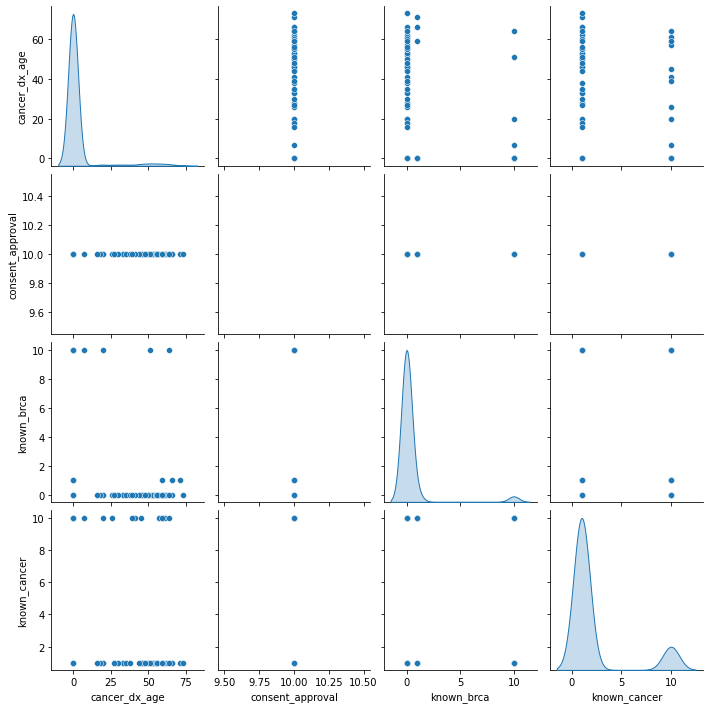

In [229]:
sns.pairplot(train_dataset[['cancer_dx_age', 'consent_approval', 'known_brca', 'known_cancer']], diag_kind='kde')

In [230]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
History_class,650.0,3.661538,4.455833,0.0,0.0,1.0,10.0,11.0
Pathogenic,650.0,0.053846,0.225888,0.0,0.0,0.0,0.0,1.0
cancer_dx,650.0,1.401538,1.859552,1.0,1.0,1.0,1.0,10.0
cancer_dx_age,650.0,2.990769,12.010393,0.0,0.0,0.0,0.0,73.0
consent_approval,650.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
known_brca,650.0,0.380000,1.812956,0.0,0.0,0.0,0.0,10.0
known_cancer,650.0,2.190769,3.051773,1.0,1.0,1.0,1.0,10.0
rel_age_1,650.0,60.795385,261.978297,0.0,0.0,50.0,62.0,4555.0
rel_age_2,650.0,39.901538,214.189833,0.0,0.0,0.0,60.0,5060.0
rel_age_3,650.0,24.506154,131.735087,0.0,0.0,0.0,45.0,2570.0


In [232]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('History_class')
test_labels = test_features.pop('History_class')

In [233]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
History_class,3.661538,4.455833
Pathogenic,0.053846,0.225888
cancer_dx,1.401538,1.859552
cancer_dx_age,2.990769,12.010393
consent_approval,10.000000,0.000000
known_brca,0.380000,1.812956
known_cancer,2.190769,3.051773
rel_age_1,60.795385,261.978297
rel_age_2,39.901538,214.189833
rel_age_3,24.506154,131.735087


In [234]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[ 0.054  1.402  2.991 10.     0.38   2.191 60.795 39.902 24.506]


In [236]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 1  1  0 10  0  1 72 32  0]]

Normalized: [[ 4.19 -0.22 -0.25   nan -0.21 -0.39  0.04 -0.04 -0.19]]


In [237]:
horsepower = np.array(train_features['cancer_dx_age'])

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

In [238]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [239]:
horsepower_model.predict(horsepower[:10])

array([[0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135],
       [0.135]], dtype=float32)

In [240]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [242]:
%%time
history = horsepower_model.fit(
    train_features['cancer_dx_age'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 3.25 s


In [243]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.170010,3.359763,95
96,3.161817,3.368664,96
97,3.157705,3.353073,97
98,3.157639,3.358419,98
99,3.154058,3.355068,99


In [266]:
hist

,loss,val_loss,epoch
0,3.384845,3.445042,0
1,3.201465,3.400180,1
2,3.179074,3.375016,2
3,3.159479,3.361233,3
4,3.160520,3.362285,4
...,...,...,...
95,3.170010,3.359763,95
96,3.161817,3.368664,96
97,3.157705,3.353073,97
98,3.157639,3.358419,98


In [246]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [History_Class]')
    plt.legend()
    plt.grid(True)

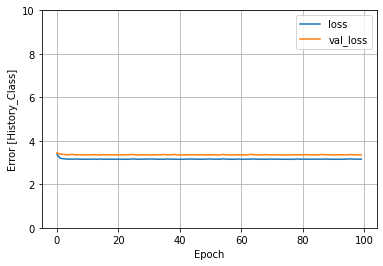

In [247]:
plot_loss(history)

In [268]:
test_results = {}

test_results['History_class'] = horsepower_model.evaluate(
    test_features['cancer_dx_age'],
    test_labels, verbose=0)

In [269]:
test_results

{'History_class': 3.4849538803100586}

In [250]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [253]:
def plot_horsepower(x, y):
    plt.scatter(train_features['cancer_dx_age'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('cancer_dx_age')
    plt.ylabel('History_Class')
    plt.legend()

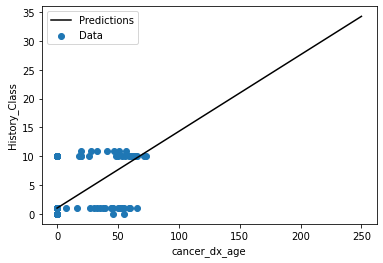

In [254]:
plot_horsepower(x,y)

In [255]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [256]:
linear_model.predict(train_features[:10])

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [257]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.678],
       [-0.76 ],
       [ 0.591],
       [ 0.073],
       [-0.472],
       [ 0.289],
       [-0.712],
       [ 0.32 ],
       [ 0.051]], dtype=float32)>

In [258]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [259]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 3.25 s


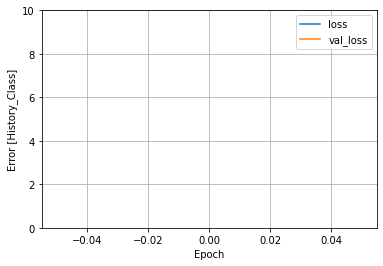

In [260]:
plot_loss(history)

In [261]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [262]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [ ]:
df = pd.DataFrame(dfArray, columns = ['Gene', 'History_class', 'Pathogenic','_method', 'cancer_dx','cancer_dx_age',
                                      'cancer_dx_type', 'consent_approval','ethnicity_1','ethnicity_2', 'known_brca', 
                                      'known_cancer', 'other_cancer', 'rel_age_1', 'rel_age_2', 'rel_age_3', 'rel_cancer', 
                                      'rel_relation', 'relationships'])

In [ ]:
df['Gene'] = df['Gene'].astype('string')
df['History_class'] = df['History_class'].astype('string')
df['Pathogenic'] = df['Pathogenic'].astype('string')
df['_method'] = df['_method'].astype('string')
df['cancer_dx'] = df['cancer_dx'].astype('string')
df['cancer_dx_type'] = df['cancer_dx_type'].astype('string')
df['consent_approval'] = df['consent_approval'].astype('string')
df['ethnicity_1'] = df['ethnicity_1'].astype('string')
df['ethnicity_2'] = df['ethnicity_2'].astype('string')
df['known_brca'] = df['known_brca'].astype('string')
df['known_cancer'] = df['known_cancer'].astype('string')
df['other_cancer'] = df['other_cancer'].astype('string')
df['relationships'] = df['relationships'].astype('string')
    
df['rel_cancer'] = df['rel_cancer'].astype('string')
df['rel_relation'] = df['rel_relation'].astype('string')


df['rel_age_1'] = df['rel_age_1'].astype('int64')
df['rel_age_2'] = df['rel_age_2'].astype('int64')
df['rel_age_3'] = df['rel_age_3'].astype('int64')
df['cancer_dx_age'] = df['cancer_dx_age'].astype('int64')

In [ ]:
df

In [ ]:
dfR = df.drop(['Gene','Pathogenic','_method', 'relationships', 'consent_approval', 'History_class'], axis=1)

In [ ]:
df.to_excel("output.xlsx")  

# Here we go again

In [202]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
df.values

array([['11', '0', '10', ..., '70', '01001000000110000000100000000000',
        '000000000001000'],
       ['11', '0', '01', ..., '00000000000000000000000000000000',
        '000000000000000', <NA>],
       ['11', '0', '10', ..., '00000010000000000000000000000001',
        '100010000000010', <NA>],
       ...,
       ['00', '0', '01', ..., '0', '00000000000000000000000000000000',
        '000000000000000'],
       ['00', '0', '01', ..., '0', '00000000000000000000000000000000',
        '000001000000000'],
       ['00', '0', '01', ..., '0', '00000000000000000000000000000000',
        '000000000000000']], dtype=object)

In [205]:
X = df.drop(['Pathogenic', 'consent_approval'], axis=1).to_numpy()
y = df["History_class"]

In [206]:
X[0]

array(['11', '10', '57', '100000000000000000000000', '00', '10', '55',
       '64', '70', '01001000000110000000100000000000', '000000000001000'],
      dtype=object)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = SimpleLinearRegression('zeros')
linear_model.train(x_train_norm, y_train_norm, learning_rate=0.1, epochs=50)

In [209]:
X_train = X_train.astype(np.str)
y_train = y_train.astype(np.str)

In [221]:
X_train

array([['10', '01', '0', ..., '61', '00001000000000000000000000000000',
        '101000000101000'],
       ['10', '01', '0', ..., '00001000000000000000000000100000',
        '100001100000000', '<NA>'],
       ['01', '01', '0', ..., '0', '00100000000001000000000000000000',
        '000000100000001'],
       ...,
       ['00', '01', '0', ..., '0', '00000000000000000000000000000000',
        '000000000000000'],
       ['01', '01', '0', ..., '0', '00010000000000000000000000000000',
        '100000000000000'],
       ['00', '01', '0', ..., '0', '00000000000010000000000000000000',
        '100000000000000']], dtype='<U32')

In [222]:
y_train

410     10
170     10
939     01
1005    00
209     10
        ..
1095    00
1130    00
1294    00
860     01
1126    00
Name: History_class, Length: 1061, dtype: object

In [223]:
model.fit(X_train, y_train)

AssertionError: in user code:

    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:517 _run_internal_graph
        assert x_id in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("Outputlayer/Sigmoid_3:0", shape=(None, 1), dtype=float32)


# Lets do this

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt

import math
import tensorflow as tf
import numpy as np
from numpy import unique
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, TensorBoard

In [190]:
dataframe = dfR

In [191]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
pred_dataframe = dataframe.sample(frac=0.1, random_state=15)
train_dataframe = dataframe.drop(val_dataframe.index)

In [192]:
print("Using %d samples for training, %d for validation and %d for predicting" 
      % (len(train_dataframe), len(val_dataframe), len(pred_dataframe)))

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("History_class")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


def pred_dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe)))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds



train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)
pred_ds = pred_dataframe_to_dataset(pred_dataframe)

for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

Using 650 samples for training, 163 for validation and 81 for predicting
Input: {'Pathogenic': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cancer_dx': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cancer_dx_age': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'consent_approval': <tf.Tensor: shape=(), dtype=int64, numpy=10>, 'known_brca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'known_cancer': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'rel_age_1': <tf.Tensor: shape=(), dtype=int64, numpy=53>, 'rel_age_2': <tf.Tensor: shape=(), dtype=int64, numpy=70>, 'rel_age_3': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [193]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature

In [194]:
dataframe.dtypes

History_class       int64
Pathogenic          int64
cancer_dx           int64
cancer_dx_age       int64
consent_approval    int64
known_brca          int64
known_cancer        int64
rel_age_1           int64
rel_age_2           int64
rel_age_3           int64
dtype: object

In [215]:
Pathogenic = keras.Input(shape=(11,), name="Pathogenic", dtype="int64")
Cancer_Dx = keras.Input(shape=(1,), name="cancer_dx", dtype="int64")
Cancer_dx_Age = keras.Input(shape=(1,), name="cancer_dx_age", dtype="int64")
Consent_Approval = keras.Input(shape=(1,), name="consent_approval", dtype="int64")
#Ethnicity = keras.Input(shape=(1,), name="ethnicity", dtype="int64")
Known_BRCA = keras.Input(shape=(1,), name="known_brca", dtype="int64")
Known_Cancer = keras.Input(shape=(1,), name="known_cancer", dtype="int64")
Relative_Age_1 = keras.Input(shape=(1,), name="rel_age_1", dtype="int64")
Relative_Age_2 = keras.Input(shape=(1,), name="rel_age_2", dtype="int64")
Relative_Age_3 = keras.Input(shape=(1,), name="rel_age_3", dtype="int64")
#Relative_Cancer = keras.Input(shape=(1,), name="rel_cancer", dtype="int64")
#Relative_Relation = keras.Input(shape=(1,), name="rel_relation", dtype="int64")


#History_class  = keras.Input(shape=(1,), name="History_class", dtype="string")



#Cancer_dx_Age = keras.Input(shape=(1,), name="cancer_dx_age")
#Relative_Age_1 = keras.Input(shape=(1,), name="rel_age_1")
#Relative_Age_2 = keras.Input(shape=(1,), name="rel_age_2")
#Relative_Age_3 = keras.Input(shape=(1,), name="rel_age_3")


all_inputs = [Pathogenic,
                Cancer_Dx,
                Cancer_dx_Age,
                Consent_Approval,
                Ethnicity,
                Known_BRCA,
                Known_Cancer,
                Relative_Age_1,
                Relative_Age_2,
                Relative_Age_3,
                Relative_Cancer,
                Relative_Relation]

In [216]:
Pathogenic

<tf.Tensor 'Pathogenic_6:0' shape=(None, 11) dtype=int64>

In [217]:
Pathogenic_encoded = encode_integer_categorical_feature(Pathogenic, "Pathogenic", train_ds)
Cancer_Dx_encoded = encode_integer_categorical_feature(Cancer_Dx, "cancer_dx", train_ds)
Cancer_dx_Age_encoded = encode_integer_categorical_feature(Cancer_dx_Age, "cancer_dx_age", train_ds)
Consent_Approval_encoded = encode_integer_categorical_feature(Consent_Approval, "consent_approval", train_ds)
#Ethnicity_encoded = encode_integer_categorical_feature(Ethnicity, "ethnicity", train_ds)
Known_BRCA_encoded = encode_integer_categorical_feature(Known_BRCA, "known_brca", train_ds)
Known_Cancer_encoded = encode_integer_categorical_feature(Known_Cancer, "known_cancer", train_ds)
Relative_Age_1_encoded = encode_integer_categorical_feature(Relative_Age_1, "rel_age_1", train_ds)
Relative_Age_2_encoded = encode_integer_categorical_feature(Relative_Age_2, "rel_age_2", train_ds)
Relative_Age_3_encoded = encode_integer_categorical_feature(Relative_Age_3, "rel_age_3", train_ds)
#Relative_Cancer_encoded = encode_integer_categorical_feature(Relative_Cancer, "rel_cancer", train_ds)
#Relative_Relation_encoded = encode_integer_categorical_feature(Relative_Relation, "rel_relation", train_ds)

In [218]:

all_features = layers.concatenate(
    [
    Pathogenic_encoded,
    Cancer_Dx_encoded,
    Cancer_dx_Age_encoded,
    Consent_Approval_encoded,
    #Ethnicity_encoded, 
    Known_BRCA_encoded, 
    Known_Cancer_encoded,
    Relative_Age_1_encoded,
    Relative_Age_2_encoded,
    Relative_Age_3_encoded,
    #Relative_Cancer_encoded, 
    #Relative_Relation_encoded
    ]
)

# Multiple layers with dropout (for higher accuracy)
x = layers.Dense(187, activation="tanh", name = "Dense_1")(all_features)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu", name = "Dense_2")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu", name = "Dense_3")(x)
output = layers.Dense(1, activation="sigmoid",name = "Outputlayer")(x)

model = keras.Model(all_inputs, output)

#Use Adam optimizer with custom learning rate

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(opt, "binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Pathogenic (InputLayer)         [(None, 11)]         0                                            
__________________________________________________________________________________________________
cancer_dx (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
cancer_dx_age (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
consent_approval (InputLayer)   [(None, 1)]          0                                            
_______________________________________________________________________________________

In [219]:
checkpoint = ModelCheckpoint('./checkpoints/best_weights.tf', monitor='val_accuracy', save_best_only=True, mode='auto')

In [220]:
model.fit(train_ds)

AssertionError: in user code:

    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    c:\users\kunal\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:517 _run_internal_graph
        assert x_id in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("Outputlayer/Sigmoid_3:0", shape=(None, 1), dtype=float32)


In [ ]:
history = model.fit(train_ds, epochs=70, validation_data=val_ds, callbacks=[checkpoint])

# Other

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [ ]:
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())

In [ ]:
driver.get('https://en.wikipedia.org/wiki/List_of_contemporary_ethnic_groups')

In [ ]:
lstOfEthnicities = []
for i in range(1,497):
    #print(driver.find_element_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody/tr['+str(i)+']/td[1]').text)
    lstOfEthnicities.append(driver.find_element_by_xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody/tr['+str(i)+']/td[1]').text)
lstOfEthnicities.append('caucasian')

In [ ]:
driver.quit()

In [ ]:
'norwegian' in lstOfEthnicities